## **Data Question 1: An Exploration of UN data**

### Guided Practice:
 1.	Download two CSV files and place them in the `data` folder of your local Data Question 1 repository:
    
    a.	Gross Domestic Product (GDP) per capita: 
[http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD)
        * **DO NOT APPLY ANY FILTERS**
        * rename the file to gdp_per_capita.csv
        * open it with a text editor (not Excel) and take a look
    
    b.	Percentage of Individuals using the Internet: 
[http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H](http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H)
        * **DO NOT APPLY ANY FILTERS**
        * rename the file to internet_use.csv
        * open it with a text editor (not Excel) and take a look


2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.


3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd` 
    
    `import numpy as np` 
    
    `import matplotlib.pyplot as plt` 
    
    `import seaborn as sns`
    
    `import scipy.stats as stats`
    
    `import statsmodels.api as sm`
    
    Keep all imports in this cell at the top of your notebook.


4.	At the bottom of your imports cell, use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
# For interactive plots:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from ipywidgets import interact, FloatSlider, IntSlider
cf.go_offline()

In [3]:
# set option to view more rows and columns:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [4]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
# Take a look at the first 10 rows.
print(gdp_df.head(10))
# Look at the last 5 rows. Do you see a problem?
print(gdp_df.tail())
# Note that there is a file footer in the last two rows.

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
5     Afghanistan  2013  1807.762344              NaN
6     Afghanistan  2012  1772.764974              NaN
7     Afghanistan  2011  1626.764793              NaN
8     Afghanistan  2010  1671.581238              NaN
9     Afghanistan  2009  1502.354073              NaN
     Country or Area                                      Year        Value  \
6726        Zimbabwe                                      1992  2591.007534   
6727        Zimbabwe                                      1991  2906.272849   
6728        Zimbabwe                                      1990  2819.549467   
6729   footnoteSeqID                                  Footnote          NaN   
6730       

In [5]:
# Redo the read_csv() call to correct this issue - do not modify the original csv file.
# Read in the csv and remove the last two rows:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
# Check that the end of the file no longer has the footer:
print(gdp_df.tail())

     Country or Area  Year        Value  Value Footnotes
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN


In [6]:
# ALTERNATIVE METHODS THAT WORK:
# gdp_df.drop(gdp_df.tail(2).index,inplace=True)
# df = pd.read_csv(filename, skipfooter=2, engine='python')

6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [7]:
# Drop the Value Footnotes column:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [8]:
# ALTERNATIVE METHODS THAT WORK:
# gdp_df = gdp_df.drop(columns = 'Value Footnotes')
# gdp_df = gdp_df.drop(labels = 'Value Footnotes', axis = 1)

In [9]:
# Rename the columns:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [10]:
# ALTERNATIVE METHODS THAT WORK:
# gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value":"GDP_Per_Capita"} )

7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
# Apply .shape to show the # of columns and rows:
gdp_df.shape

(6729, 3)

In [12]:
# Apply .info() to show the number of rows, columns, count of non-null values, and data types:
gdp_df.info()
# The 'Year' column should probably be an integer to make it easier to do math with it, if necessary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [13]:
# Apply .astype() to gdp_df.Year in order to change the data type of the values in the 'Year' field:
gdp_df.Year = gdp_df.Year.astype(int)

In [14]:
# NOTES AND ALTERNATIVE METHODS THAT WORK:
# astype() can be used to turn things into manny different data types, e.g. gdp_df.Country = gdp_df.Country.astype(str)
# The preferable method to transform an object into a numeric value (int or float, depending on the data) would be pd.to_numeric(gdp_df['Year'])

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
# Apply unique() to get the distinct values within the gdp_df.Year field and
# Apply nunique() to get the count of distinct values within the gdp_df.Year field:
print(gdp_df.Year.unique())
print(gdp_df.Year.nunique())

[2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005
 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991
 1990]
29


In [16]:
# Apply .value_counts() and
# Sort the values by the year using .sort_index() in order to get the number of observations per year:
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

Notes on the number of observations per year:  
_The number of observations increases slightly year-over-year between 1990 and 2011 (210 - 243). They then start to decline between 2011 and 2018 (243-226). The range of observations (210 to 243) is pretty small, though._

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [17]:
# Count the number of unique values in the Country column of gdp_df to get the number of countries represented:
gdp_df['Country'].nunique()

243

In [18]:
# Apply .value_counts() and
# Sort the values by number of values in order to get the number of observations per country:
gdp_df['Country'].value_counts(sort = True).tail(20)

Montenegro                   22
San Marino                   21
Libya                        20
Cayman Islands               20
Eritrea                      20
Timor-Leste                  19
Other small states           19
Kosovo                       19
Liberia                      19
Qatar                        19
CuraÃ§ao                     19
Small states                 19
Palau                        19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, dtype: int64

In [19]:
# ALTERNATIVE METHODS THAT WORK:
# gdp_df.Country.value_counts(ascending = True).head(20)

In [20]:
# NOTES:
# To answer the question of why certain countries have fewer observations than others:
# Show the data for the bottom 5 countries by number of observations:
# print(gdp_df[gdp_df.Country.isin(['Djibouti', 'Turks and Caicos Islands', 'South Sudan', 'Sint Maarten (Dutch part)', 'Nauru'])])

# Because I was curious, I also subsetted the gdp_df dataframe to see just the 'Early-demographic dividend' results (not sure what those lines represent?)
# print(gdp_df[gdp_df.Country == 'Early-demographic dividend'])

Why do you think these countries have so few observations?  
_For at least a couple of the observations (e.g. South Sudan), the country didn't exist for part of the period covered. Generally, the countries at the bottom of the list appear to be quite small and they have a delay in the start of their observations, so perhaps data weren't collected before a certain date. Djibouti strikes me as odd, however, given that it has been around for a while and there is only one observation in 2011._

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [21]:
gdp_2014 = gdp_df[gdp_df.Year == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
4             Afghanistan  2014     1795.735834
21                Albania  2014    10700.993216
50                Algeria  2014    13557.769757
79                 Angola  2014     6813.052106
108   Antigua and Barbuda  2014    20440.540555
...                   ...   ...             ...
6592   West Bank and Gaza  2014     4445.307470
6617                World  2014    14514.392218
6646                Yemen  2014     3828.484887
6675               Zambia  2014     3684.685507
6704             Zimbabwe  2014     2506.490220

[240 rows x 3 columns]


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [22]:
gdp_2014.GDP_Per_Capita.describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

12. Create a histogram of GDP Per Capita numers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

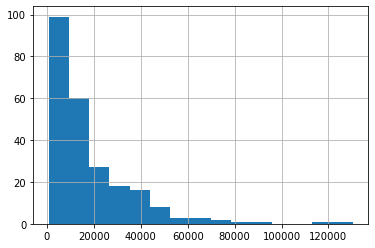

In [23]:
# The square root of the total number of observations = c. 15.5
gdp_2014.GDP_Per_Capita.hist(bins = 15);

Describe the shape of the distribution:  
_The GDP distribution is unimodal (that is, one clear high-point). 2014 GDPs are generally clustered < 20,000 and the dataset appears to have a strong right skew._

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [24]:
# lowest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).head(5))
# highest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).tail(5))

                       Country  Year  GDP_Per_Capita
1014  Central African Republic  2014      672.681648
794                    Burundi  2014      768.469837
1375           Dem. Rep. Congo  2014      784.872656
4414                     Niger  2014      900.136918
3697                    Malawi  2014     1142.530804
               Country  Year  GDP_Per_Capita
707             Brunei  2014    76448.593329
5316         Singapore  2014    81965.361071
3610        Luxembourg  2014    92349.186429
5003             Qatar  2014   116693.507701
3639  Macao SAR, China  2014   130439.106674


14. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the `GDP_Per_Capita` amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [25]:
# Create a general pivot table of all the data:
gdp_pivoted_total = pd.pivot_table(gdp_df, values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')
# Check what got created:
gdp_pivoted_total.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1016.245409,1055.557459,1025.208245,1099.104568,1123.871323,1247.753118,1267.644939,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,5442.578047,5949.343236,6238.119724,6607.767627,7001.054082,7426.115443,7914.035853,8450.918236,9154.713749,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,10257.741569,10427.985155,10872.434079,11507.482991,11845.170512,12370.892005,12397.467048,12621.644172,12714.813508,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,3892.316925,3924.316196,4314.540938,4295.908569,4604.657044,5112.589202,5500.242536,6044.217156,6474.376423,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,20769.095862,19434.407507,19361.859855,20274.538252,21161.123532,22205.989187,24657.465145,26516.740954,26083.167762,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896


In [26]:
# Slice the data to only have 1990 and 2017 data:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)]
# Check that it worked:
gdp_pivoted.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2017,1758.465636
18,Albania,2017,11796.719185
45,Albania,1990,4458.247115
47,Algeria,2017,13822.389087
74,Algeria,1990,10300.015042


In [27]:
# Create a pivot table based on the sliced data, then drop the null values:
gdp_pivoted = gdp_pivoted.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
# Check that it worked:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


In [28]:
# NOTES:
# Below, the values are put into a list format. This creates a multilevel index.
# If a weird 'Key Error' is thrown, trouble-shoot this by running df.columns to see what the actual column names are.
# gdp_pivoted = gdp_pivoted.pivot_table(values = ['GDP_Per_Capita'], index = ['Country'], columns = ['Year']).dropna()
# To select a column from a multilevel index pivot table, slice it like this: gdp_pivoted[('GDP_Per_Capita', 1990)]

In [29]:
# ALTERNATIVE METHODS THAT WORK:
# gdp_pivoted_combined = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)].pivot_table(values = ['GDP_Per_Capita'], index = ['Country'], columns = ['Year']).dropna()
# print(gdp_pivoted_combined)

15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in 
GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [30]:
gdp_pivoted['Percent_Change'] = 100 * ((gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990])

16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [31]:
# Create a dataframe to store all of the countries with negative % change in GDP between 1990 and 2017
# Sorted by Percent_Change column:
gdp_pivoted_neg_change = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0].sort_values(by=['Percent_Change'])
# View the negative GDP % change observations:
print(gdp_pivoted_neg_change)
# Count up how many countries are in the dataframe without reindexing:
print(len(gdp_pivoted_neg_change.index))

Year                               1990          2017  Percent_Change
Country                                                              
Dem. Rep. Congo             1386.933242    807.752905      -41.759785
United Arab Emirates      112349.597967  66477.818719      -40.829500
Burundi                     1027.396660    670.777072      -34.710993
Yemen                       3425.707169   2404.422370      -29.812379
Ukraine                    10463.959955   7906.540301      -24.440266
Central African Republic     982.659793    746.434942      -24.039332
Venezuela                  14619.454190  11489.648818      -21.408497
Tajikistan                  3661.340213   2923.673718      -20.147445
Haiti                       2061.842854   1653.001460      -19.828931
Gabon                      19556.665840  16144.935297      -17.445359
Madagascar                  1928.012284   1648.373871      -14.503975
Brunei                     84693.336970  72523.729446      -14.369026
Zimbabwe            

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? Bonus: Put both line charts on the same plot.

In [32]:
# Take a look at the top 2 countries by % change in GDP per capita:
gdp_pivoted.sort_values(by='Percent_Change', ascending = False).head(2)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


In [33]:
# Create a list with the Country names of the top 2 countries:
gdp_change_top_2 = gdp_pivoted.sort_values(by='Percent_Change', ascending = False).reset_index().iloc[:2,0].to_list()
# Return it to see what's in the list:
gdp_change_top_2

['Equatorial Guinea', 'China']

In [34]:
# Create a pivot table for China and Equatorial Guinea where each year is a column and each Country is a column:
top_2_gdp_pivoted_on_year = gdp_df[gdp_df['Country'].isin(gdp_change_top_2)].pivot_table(values = 'GDP_Per_Capita', index = 'Year', columns = 'Country')
# Take a look at the pivoted dataframe:
print(top_2_gdp_pivoted_on_year)

Country         China  Equatorial Guinea
Year                                    
1990      1521.963868        1017.764136
1991      1640.874263         975.558189
1992      1851.315492        1272.159060
1993      2083.952315        1365.588482
1994      2329.474589        1538.475957
1995      2556.604860        1743.205357
1996      2781.130626        2796.398459
1997      3006.918054        6721.724501
1998      3211.623211        7991.571984
1999      3428.063172        9640.704755
2000      3689.967255       10937.697039
2001      3968.773863       17149.018503
2002      4302.226871       19655.328898
2003      4704.586800       21475.814494
2004      5149.601901       28384.466729
2005      5702.800579       31697.801471
2006      6392.373888       32618.640600
2007      7264.060036       35901.459696
2008      7924.644365       40368.079634
2009      8626.532479       39060.913034
2010      9498.079744       33990.146771
2011     10355.495713       34622.116266
2012     11115.1

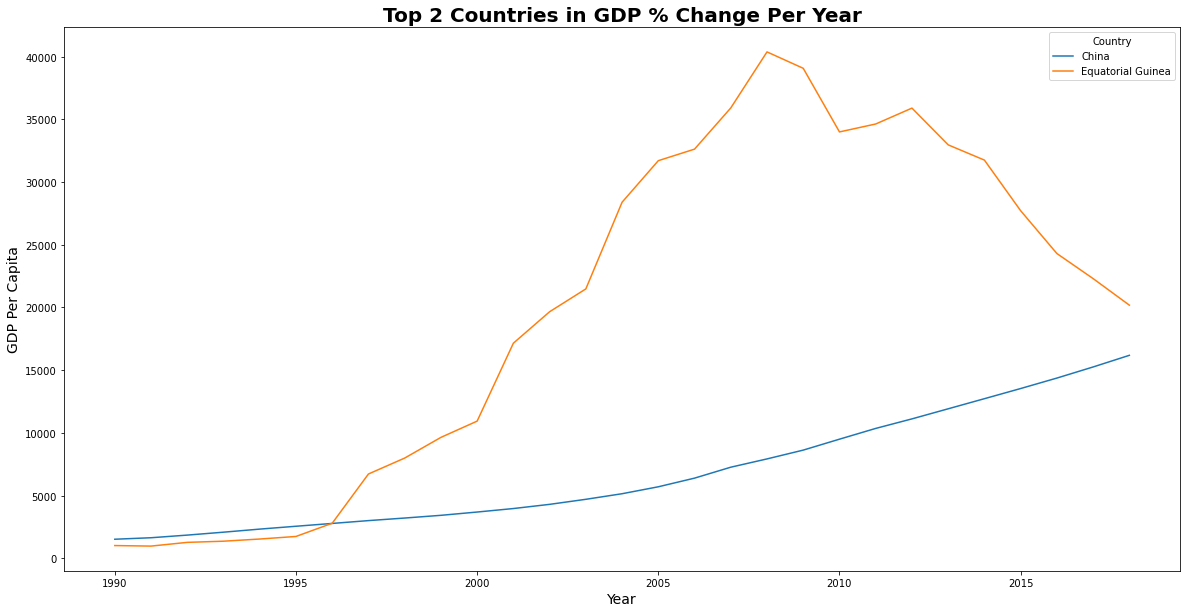

In [35]:
# Plot the top-2 pivoted table as a line graph:
fontsize_label = 14
fontsize_title = 20
fontweight_title = 'bold'
figsize_gen = (20, 10)

top_2_gdp_pivoted_on_year.plot(kind = 'line', figsize = figsize_gen)
plt.ylabel('GDP Per Capita', fontsize = fontsize_label)
plt.xlabel('Year', fontsize = fontsize_label)
plt.title('Top 2 Countries in GDP % Change Per Year', fontsize = fontsize_title, fontweight = fontweight_title)
plt.show()

_While China's GDP per capita has grown steadily, Equatorial Guinea's GDP per capita grew dramatically between 1995 and 2010 but has seen a rather steep downward trend since then._

In [36]:
# NOTES:

# To plot all countries on one graph start with:
# gdp_pivoted_on_year = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Year', columns = 'Country')
# print(gdp_pivoted_on_year)
# gdp_pivoted_on_year.plot(kind = 'line', figsize = (20, 20))
# plt.show()

# Alternative to plot all countries on one graph:
# distinct_countries = gdp_df['Country'].unique().tolist()
# gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(distinct_countries)]
# fig, ax = plt.subplots()
# gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax)
# ax.legend(distinct_countries);

# Alternative using the seaborn library instead:
# plt.figure(figsize=(15,5))
# sns.set_style("whitegrid")
# sns.lineplot(data= top_2_gdp_pivoted_on_year, x = 'Year', y='GDP_Per_Capita', hue ='Country');

# Ignore me, I'm just a useless plot of all GDP globally per  year
# gdp_df.groupby('Year')['GDP_Per_Capita'].agg('sum').plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita');
# plt.show()


18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [37]:
# Read in the csv:
continents = pd.read_csv('../data/continents.csv')
# Check the top of the file:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [38]:
# Merge the dataframes, inner join by default:
gdp_df = gdp_df.merge(continents, on='Country')

In [39]:
# Check the top of the new, merged dataframe:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


20. Determine the number of countries per continent. Create a bar chart showing this.

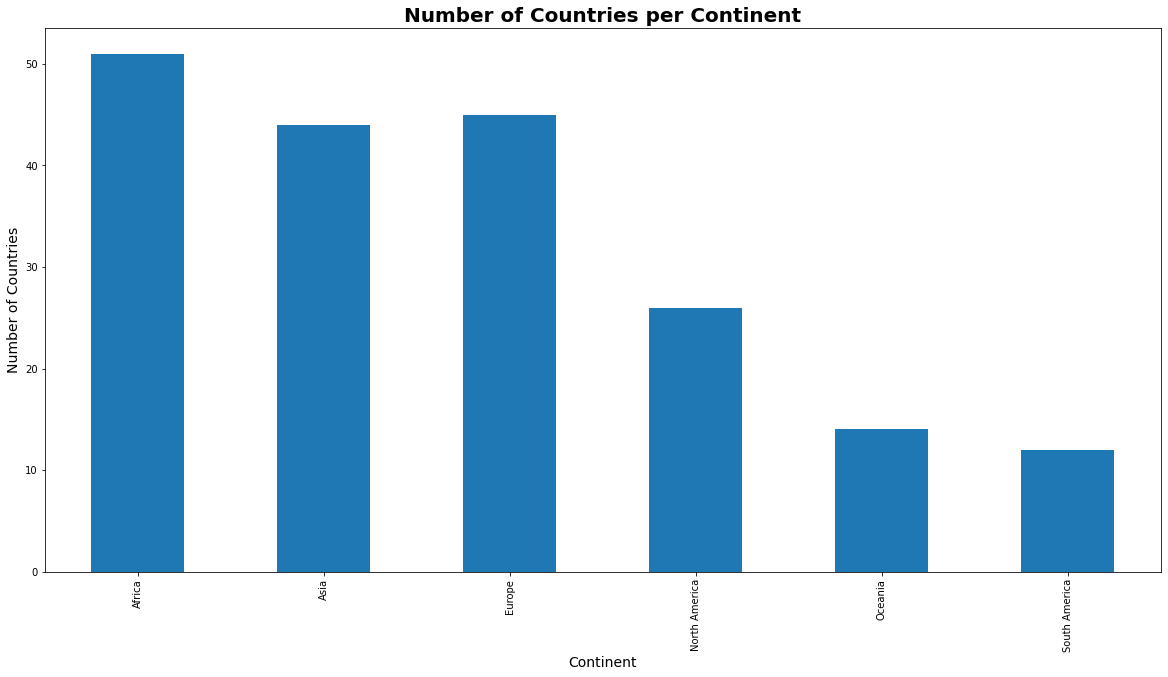

In [40]:
# Group the countries by continent and then count and plot them:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar', figsize = figsize_gen)
plt.xlabel('Continent', fontsize = fontsize_label)
plt.ylabel('Number of Countries', fontsize = fontsize_label)
plt.title('Number of Countries per Continent', fontsize = fontsize_title, fontweight = fontweight_title)
plt.show()

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

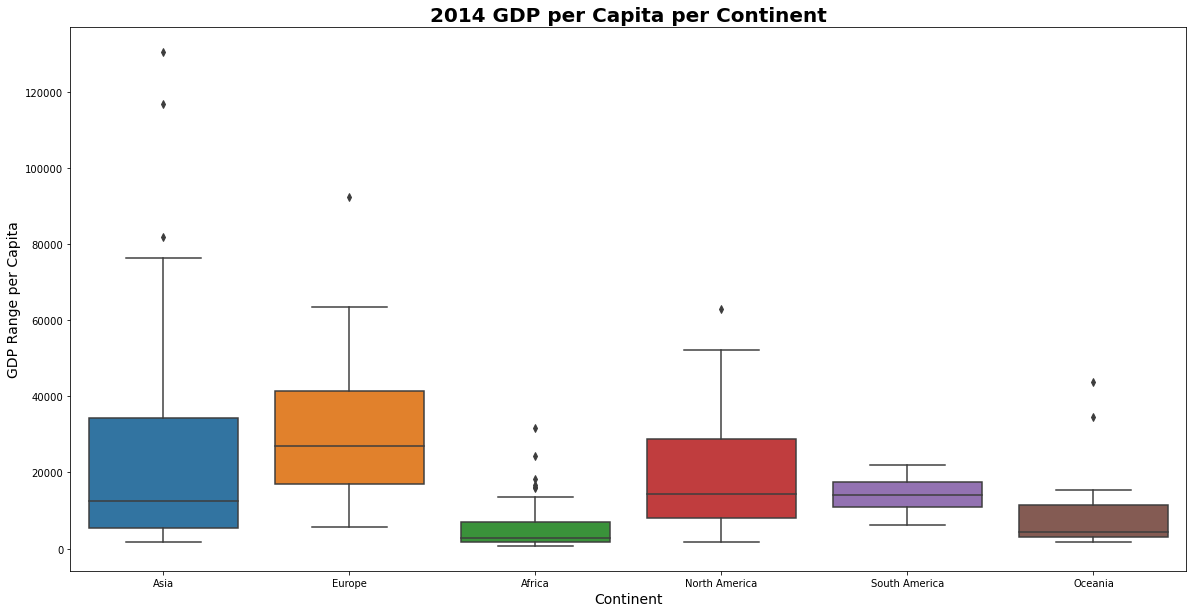

In [41]:
plt.figure(figsize = figsize_gen)
sns.boxplot(x = 'Continent',
            y = 'GDP_Per_Capita',
            data = gdp_df[gdp_df['Year'] == 2014])
plt.xlabel('Continent', fontsize = fontsize_label)
plt.ylabel('GDP Range per Capita', fontsize = fontsize_label)
plt.title('2014 GDP per Capita per Continent', fontsize = fontsize_title, fontweight = fontweight_title);


22. Read in `internet_use.csv` into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, do not modify the original datasets.

In [42]:
# A simple import:
# internet_df = pd.read_csv('../data/internet_use.csv')
# Produces this error:
# Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6

In [43]:
# Here is a method to only get the three desired columns - avoiding having to drop Value Footnotes
# And avoid the documentation at the end of the file:
internet_df = pd.read_csv('../data/internet_use.csv', usecols=['Country or Area', 'Year', 'Value'])[:-181]
# Checking to see if that was right:
internet_df.tail()

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080326724463
4491,Zimbabwe,1996,0.016790483892511
4492,Zimbabwe,1995,0.00768353991953285
4493,Zimbabwe,1994,0.00173927955909959
4494,Zimbabwe,1990,0


In [44]:
# ALTERNATIVE METHODS THAT WORK:
# internet_df = pd.read_csv('../data/internet_use.csv', skiprows=list(range(4497,4688)))

23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [45]:
# Don't need to drop the last column because it has not been read in.
# One method to rename the columns:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [46]:
# Get the number of rows, columns, column names, data types, count of non-null values, etc:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4495 non-null   object
 1   Year                4495 non-null   object
 2   Internet_Users_Pct  4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


In [47]:
# Explicitly cast Internet Users Percent to a float:
internet_df['Internet_Users_Pct'] = internet_df['Internet_Users_Pct'].astype(float)

In [48]:
# Use pd.to_numeric to cast Year as an integer or float
internet_df['Year'] = pd.to_numeric(internet_df['Year'])

25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [49]:
# Get the lowest value in the 'Year' column where the number of Internet Users % is more than 0:
internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

1990

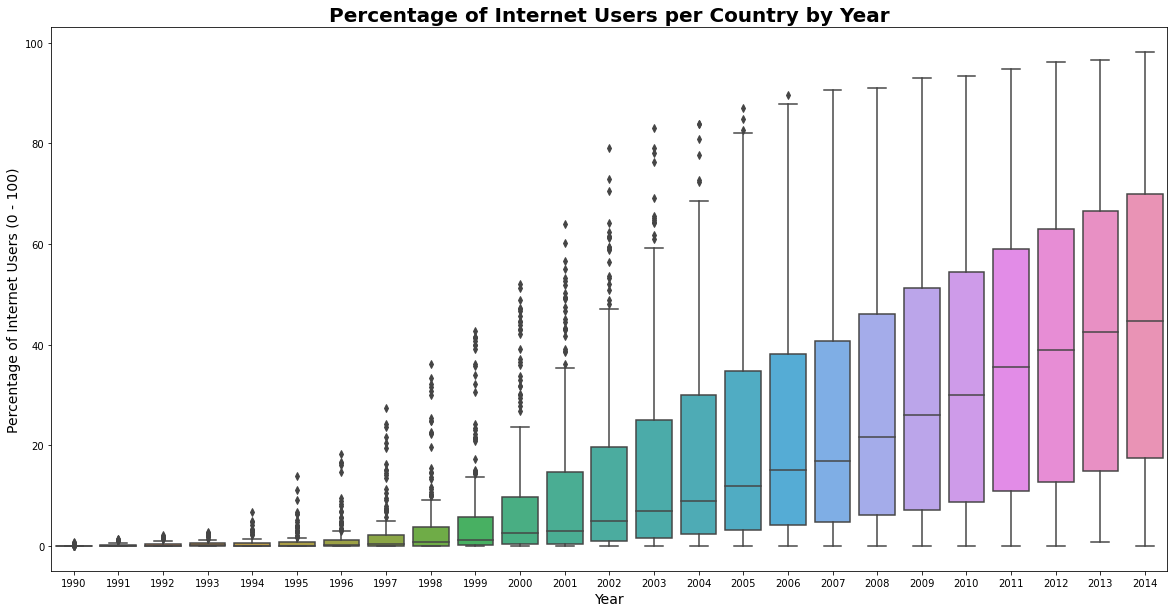

In [50]:
plt.figure(figsize = figsize_gen)
sns.boxplot(x = 'Year',
            y = 'Internet_Users_Pct',
            data = internet_df[internet_df['Year'] >= 1990])
plt.xlabel('Year', fontsize = fontsize_label)
plt.ylabel('Percentage of Internet Users (0 - 100)', fontsize = fontsize_label)
plt.title('Percentage of Internet Users per Country by Year', fontsize = fontsize_title, fontweight = fontweight_title);

**Note:** I think that the boxplot is a useful visualization because it illustrates the median % of Internet Users per Country, the IQR of Internet Users per Country, and it makes it easy to pick out the outliers (especially for the late 1990s / early 2000s). It does _not_ show the global median number of Internet Users because it is a visualization of a rate, not of raw numbers, and bigger countries like the US are weighed the same as smaller countries like San Marino.

In [51]:
# NOTES:
# If desiring to get ever country's internet users % as a separate plot, use this:
# internet_df[internet_df['Internet_Users_Pct'] > 0].groupby(['Country']).plot(x='Year', y='Internet_Users_Pct')
# Note that it will eat up a lot of memory.

# For only one country:
# gdp_pivoted.sort_values('Percent_Change', ascending=False)
# gdp_lineplot = gdp_df.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
# gdp_lineplot
# gdp_lineplot.loc['Equatorial Guinea'].plot(y='value', title='GDP Per Capita of Equatorial Guinea');

# For the mean (again of the rate, not of the actual access to / use of internet):
# internet_df[internet_df['Internet_Users_Pct']>0].groupby('Year').mean().plot();

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.  
**Difficult Bonus**: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.  
FuzzyWuzzy: https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6

In [52]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'])

In [53]:
# gdp_df['fuzz_country'] = gdp_df['Country'].apply(lambda x : [process.extractOne(x, internet_df['Country'], score_cutoff = 60)])
# gdp_and_internet_use_fuzz = gdp_df.merge(internet_df, left_on = 'fuzz_country', right_on = 'Country')

27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [54]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [55]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [56]:
# Create the 2014 dataframe:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [57]:
# Calculate the mean internet users % for 2014:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [58]:
# Get other summary stats on the Internet Users Pct column:
gdp_and_internet_use_2014['Internet_Users_Pct'].describe()

count    164.000000
mean      44.673536
std       29.369046
min        1.140000
25%       17.452500
50%       43.775000
75%       70.295000
max       98.160000
Name: Internet_Users_Pct, dtype: float64

In [59]:
# Return the number of countries with at least 90% internet users in 2014:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90]['Country'].nunique())

12


29. Find the countries that had the top 5 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [60]:
# Grab the top 5 countries by GDP in 2014 and write those countries' names to a list:
top_5_gdp_per_cap_2014 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).reset_index(drop=True).iloc[0:5,:]
top_5_gdp_per_cap_countries_2014 = top_5_gdp_per_cap_2014['Country'].tolist()

In [61]:
# Use that list of top-5 countries in 2014 GDP to subset the overall GDP and Internet use dataframe:
top_5_gdp_per_cap_all_years = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_5_gdp_per_cap_countries_2014)]
# Make sure things look right:
top_5_gdp_per_cap_all_years.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1685,Kuwait,2014,72588.670676,Asia,78.700000
1686,Kuwait,2013,75597.292936,Asia,75.460000
1687,Kuwait,2012,78700.458568,Asia,70.450000
1688,Kuwait,2011,78021.671676,Asia,65.769071
1689,Kuwait,2010,75359.963489,Asia,61.400000


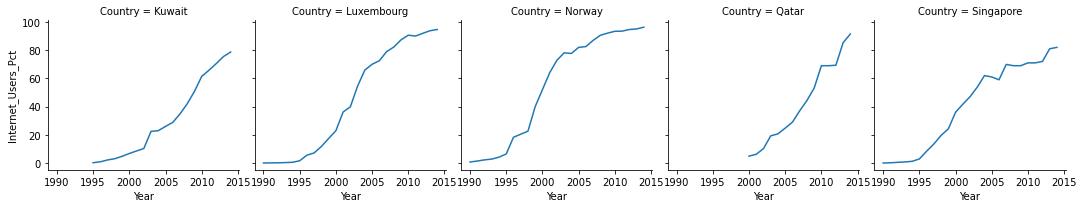

In [62]:
# Create the FacetGrid:
sfg = sns.FacetGrid(top_5_gdp_per_cap_all_years, col = 'Country')
# And put data into it (N.B. these have to be in the same cell otherwise it will not work):
sfg.map(sns.lineplot, 'Year', 'Internet_Users_Pct');

_The top 5 countries by GDP in 2014 have rather different rates and start dates for their internet adoption, though all seem to have gotten over 80% by 2014. Luxembourg and Norway, for instance, were early adopters and seem to have grown quickly in % of Internet users between 1995 and 2005. Kuwait and Qatar are later adopters (1995 and 2000, respectively) and have slightly different growth trajectories from one another (though still a reasonably steep growth rate for both). Singapore also has a steep growth rate beginning in 1995, but despite being an early Internet adopter in 1990, around 2005 the growth in % of Internet users has slowed somewhere around the 80-90% mark, lower than Luxembourg, Norway, or Qatar._

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

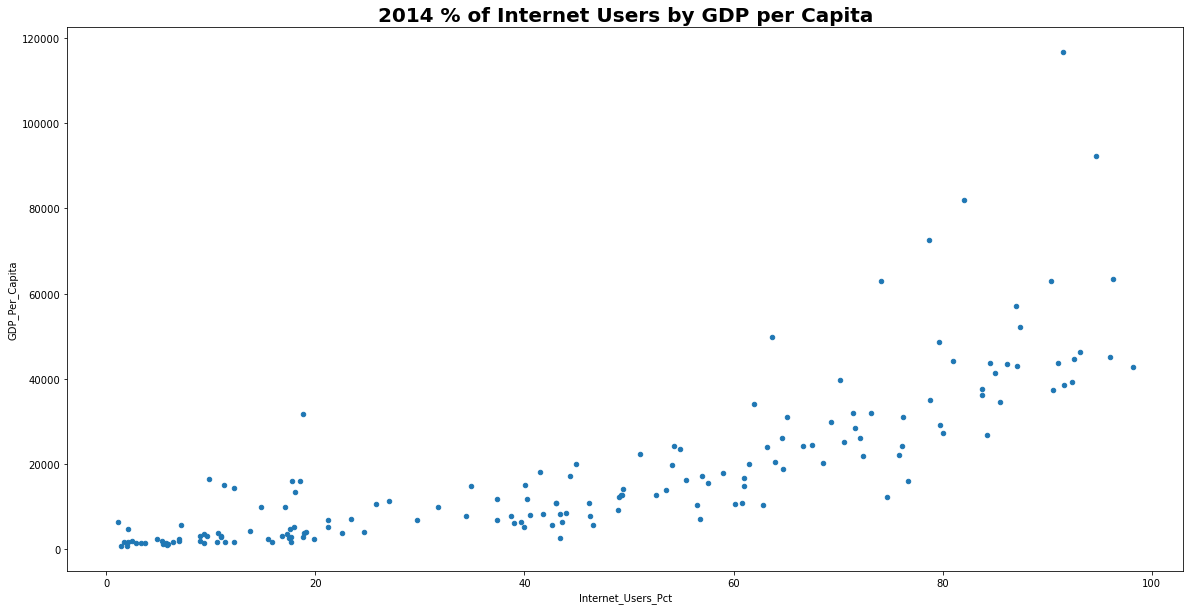

In [63]:
gdp_and_internet_use_2014.plot(kind = 'scatter', y = 'GDP_Per_Capita', x = 'Internet_Users_Pct', figsize = figsize_gen)
plt.title('2014 % of Internet Users by GDP per Capita', fontsize = fontsize_title, fontweight = fontweight_title);

_In 2014, there is a rather strong, exponential relationship between GDP per capita and the % of internet users._

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [64]:
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7879885707262836

_This number indicates that there is a strong positive correlation between the two variables. That means that as GDP per capita goes up so does the % of internet users and vice-versa in this dataset._

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [65]:
# Create a new column that stores the log of GDP per capita:
gdp_and_internet_use_2014['log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP_Per_Capita
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [66]:
# Get the correlation between the log of GDP per capita and % of Internet Users:
gdp_and_internet_use_2014['log_GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.8844322971419831

_This shows an even stronger positive correlation between the two variables. If plotted again, the relationship looks linear._

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [67]:
# Create a US-only GDP and Internet use dataframe:
US_gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

In [68]:
# Look at the first 5 rows of the new dataframe:
US_gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000


In [69]:
# Calculate the correlation between the two variables for the US only:
US_gdp_and_internet_use['GDP_Per_Capita'].corr(US_gdp_and_internet_use['Internet_Users_Pct'])

0.9916180229578646

_Is this meaningful or useful? Yes and no. On the one hand, it is interesting to see that there is **such** a close correlation between GDP per capita and % of internet users in the US between 1990 and 2014. This indicates that these two variables have moved in near-perfect lockstep since internet was introduced in the US. On the other hand, this correlation doesn't tell us if one variable is impacting the other - while we may hypothesize that increasing GDP per capita leads to a growth in the % of internet users, it could very well be the inverse or there could be no relationship at all. (Also, what happens when we reach 100% internet users?) In sum, the correlation points to an interesting place for further investigation but it does not explain the relationship between the two variables._

In [70]:
# NOTES:
# Plotting GDP per capita and % of Internet Users may be helpful:
# US_gdp_and_internet_use.plot(kind = 'scatter', x = 'GDP_Per_Capita', y = 'Internet_Users_Pct');

# Looking at the values themselves is also helpful:
# US_gdp_and_internet_use.sort_values('Year')

### Solo Data Exploration and Presentation

1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.)
2. If time allows, check out the plotly library to add additional interactivity to your plots. https://plotly.com/python/plotly-express/).

_The dataset I chose [records demographic statistics including sex (male / female only) and area of residence (urban / rural)](http://data.un.org/Data.aspx?q=urban&d=POP&f=tableCode%3a1). Due to the size of the dataset, I only downloaded 1990 - 2020 data._

##### Data import, clean-up, and exploration:

In [71]:
# Import the dataset:
pop_stats = pd.read_csv('../data/pop_by_sex_and_residence_type.csv')

In [72]:
# Check the end of the file for footnotes:
# Using the footnote line numbering, grab what seems like the last row of real data: 
pop_stats.tail(314).head()

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
38276,Zimbabwe,1990,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1991.0,9369000.0,NaN
38277,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38278,1,Data refer to the settled population based on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38279,2,Population statistics are compiled from regist...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38280,3,Statistics are compiled from registers.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Import the dataset again and drop all of the footer text:
pop_stats = pd.read_csv('../data/pop_by_sex_and_residence_type.csv')[:-313]
# Check that the last rows are real observations:
pop_stats.tail()

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
38272,Zimbabwe,1992,Total,Both Sexes,Census - de facto - complete tabulation,"Final figure, complete",1998.0,10412548.0,NaN
38273,Zimbabwe,1992,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1998.0,10412548.0,NaN
38274,Zimbabwe,1992,Total,Male,Census - de facto - complete tabulation,"Final figure, complete",1998.0,5083537.0,NaN
38275,Zimbabwe,1992,Total,Female,Census - de facto - complete tabulation,"Final figure, complete",1998.0,5329011.0,NaN
38276,Zimbabwe,1990,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1991.0,9369000.0,NaN


In [74]:
# Get some basic information about the new dataframe:
pop_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  38277 non-null  object 
 1   Year             38277 non-null  object 
 2   Area             38277 non-null  object 
 3   Sex              38277 non-null  object 
 4   Record Type      38277 non-null  object 
 5   Reliability      38277 non-null  object 
 6   Source Year      38277 non-null  float64
 7   Value            38277 non-null  float64
 8   Value Footnotes  18734 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.6+ MB


In [75]:
# Clean up the dataframe by dropping Value Footnotes,
# changing the Year to a number,
# And renaming selected columns so that they're easier to work with:
pop_stats = pop_stats.drop('Value Footnotes', axis = 1)
pop_stats.Year = pd.to_numeric(pop_stats['Year'])
pop_stats = pop_stats.rename(columns = {'Country or Area' : 'Country', 'Record Type' : 'Record_Type', 'Source Year' : 'Source_Year'})

In [76]:
# Check that the data formats are updated:
pop_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      38277 non-null  object 
 1   Year         38277 non-null  int64  
 2   Area         38277 non-null  object 
 3   Sex          38277 non-null  object 
 4   Record_Type  38277 non-null  object 
 5   Reliability  38277 non-null  object 
 6   Source_Year  38277 non-null  float64
 7   Value        38277 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [77]:
# Get a sense for how many countries might be dropped if joining pop_stats to existing dataframes:
pop_stats.Country.nunique()
# Fortunately, the number is around what we have in the other dataframes

239

In [78]:
# Dig a bit further and see how many countries have rural vs. urban data
pop_stats.groupby('Area')['Country'].nunique()

Area
Rural         188
Semi-urban      1
Total         239
Urban         192
Name: Country, dtype: int64

In [79]:
# Figure out which country has semi-urban Area observations:
# pop_stats[pop_stats['Area'] == 'Semi-urban']

In [80]:
# Since it's the Netherlands for 1990-1992, take a look at the data for that geo and those years:
# pop_stats[(pop_stats['Country'] == 'Netherlands') & (pop_stats['Year'] >= 1990) & (pop_stats['Year'] <= 1992)]

In [81]:
# It looks like the data are only from two source years
# And there are data for 1990-1992 from other years.
# Take a look at source years and see if it's possible to choose only one:
# pop_stats.groupby('Source_Year')['Country'].nunique()

In [82]:
# Get the maximum source year for every observation:
pop_max_source_year = pop_stats.groupby(['Country','Area', 'Sex', 'Year'])['Source_Year'].max().to_frame()

In [83]:
# Confirm that the new table is, indeed, a dataframe:
type(pop_max_source_year)

pandas.core.frame.DataFrame

In [84]:
# Check the names of the columns in the new dataframe:
pop_max_source_year.columns

Index(['Source_Year'], dtype='object')

In [85]:
# Practice using .loc[] with multi-level indices:
pop_max_source_year.loc['United States of America','Rural','Both Sexes', 1990]

Source_Year    1990.0
Name: (United States of America, Rural, Both Sexes, 1990), dtype: float64

In [86]:
# Merge the pop_stats dataframe back into the pop_max_source_year dataframe
# To only get the most up-to-date observations for each data point:
pop_stats_max_year = pop_max_source_year.merge(pop_stats, on=['Country', 'Area', 'Sex', 'Year', 'Source_Year'])
pop_stats_max_year.head(50)

,Country,Area,Sex,Year,Source_Year,Record_Type,Reliability,Value
0,Afghanistan,Rural,Both Sexes,1990,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13167300.0
1,Afghanistan,Rural,Both Sexes,1991,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13396400.0
2,Afghanistan,Rural,Both Sexes,1992,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13607900.0
3,Afghanistan,Rural,Both Sexes,1993,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13821900.0
4,Afghanistan,Rural,Both Sexes,1994,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14038000.0
5,Afghanistan,Rural,Both Sexes,1995,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14256300.0
6,Afghanistan,Rural,Both Sexes,1996,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14476700.0
7,Afghanistan,Rural,Both Sexes,1997,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14699000.0
8,Afghanistan,Rural,Both Sexes,1998,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14923400.0
9,Afghanistan,Rural,Both Sexes,1999,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",15145400.0


In [87]:
# Check to make sure that the merge didn't produce any strange values:
pop_stats_max_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32939 entries, 0 to 32938
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      32939 non-null  object 
 1   Area         32939 non-null  object 
 2   Sex          32939 non-null  object 
 3   Year         32939 non-null  int64  
 4   Source_Year  32939 non-null  float64
 5   Record_Type  32939 non-null  object 
 6   Reliability  32939 non-null  object 
 7   Value        32939 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [88]:
# A placeholder cell to check the unique values in each Column:
pop_stats_max_year.Area.unique()

array(['Rural', 'Total', 'Urban', 'Semi-urban'], dtype=object)

In [89]:
# Create some new columns to capture the female / male, urban / rural population breakdowns:
pop_stats_max_year['f_urban'] = (pop_stats_max_year[(pop_stats_max_year['Sex'] == 'Female') & (pop_stats_max_year['Area'] == 'Urban')]['Value'])
pop_stats_max_year['f_rural'] = (pop_stats_max_year[(pop_stats_max_year['Sex'] == 'Female') & (pop_stats_max_year['Area'] == 'Rural')]['Value'])
pop_stats_max_year['m_urban'] = (pop_stats_max_year[(pop_stats_max_year['Sex'] == 'Male') & (pop_stats_max_year['Area'] == 'Urban')]['Value'])
pop_stats_max_year['m_rural'] = (pop_stats_max_year[(pop_stats_max_year['Sex'] == 'Male') & (pop_stats_max_year['Area'] == 'Rural')]['Value'])
pop_stats_max_year

,Country,Area,Sex,Year,Source_Year,Record_Type,Reliability,Value,f_urban,f_rural,m_urban,m_rural
0,Afghanistan,Rural,Both Sexes,1990,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13167300.0,NaN,NaN,NaN,NaN
1,Afghanistan,Rural,Both Sexes,1991,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13396400.0,NaN,NaN,NaN,NaN
2,Afghanistan,Rural,Both Sexes,1992,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13607900.0,NaN,NaN,NaN,NaN
3,Afghanistan,Rural,Both Sexes,1993,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",13821900.0,NaN,NaN,NaN,NaN
4,Afghanistan,Rural,Both Sexes,1994,2013.0,Estimate - de facto,"Final figure, incomplete/questionable reliability",14038000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32934,Åland Islands,Urban,Male,2015,2016.0,Estimate - de jure,"Final figure, complete",5521.0,NaN,NaN,5521.0,NaN
32935,Åland Islands,Urban,Male,2016,2017.0,Estimate - de jure,"Final figure, complete",5538.0,NaN,NaN,5538.0,NaN
32936,Åland Islands,Urban,Male,2017,2018.0,Estimate - de jure,"Final figure, complete",5583.0,NaN,NaN,5583.0,NaN
32937,Åland Islands,Urban,Male,2018,2019.0,Estimate - de jure,"Final figure, complete",5621.0,NaN,NaN,5621.0,NaN


In [90]:
# Confirm the data types of the new cells:
pop_stats_max_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32939 entries, 0 to 32938
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      32939 non-null  object 
 1   Area         32939 non-null  object 
 2   Sex          32939 non-null  object 
 3   Year         32939 non-null  int64  
 4   Source_Year  32939 non-null  float64
 5   Record_Type  32939 non-null  object 
 6   Reliability  32939 non-null  object 
 7   Value        32939 non-null  float64
 8   f_urban      2344 non-null   float64
 9   f_rural      2309 non-null   float64
 10  m_urban      2344 non-null   float64
 11  m_rural      2309 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.3+ MB


In [91]:
# Create a new dataframe which puts all of the female / male, urban / rural values on one line per Country / Year:
pop_grouped = pop_stats_max_year.groupby(['Country', 'Year']).sum()

In [92]:
pop_grouped

Source_Year       Value    f_urban    f_rural    m_urban  \
Country       Year                                                             
Afghanistan   1990      18117.0  64482800.0  1432200.0  6415000.0  1521000.0   
              1991      18117.0  65732000.0  1472900.0  6526100.0  1563700.0   
              1992      18117.0  67006800.0  1501200.0  6629100.0  1642600.0   
              1993      18117.0  68305600.0  1554000.0  6733300.0  1700500.0   
              1994      18117.0  69629600.0  1608800.0  6838600.0  1760600.0   
...                         ...         ...        ...        ...        ...   
Åland Islands 2015      18144.0    115800.0     5950.0     8534.0     5521.0   
              2016      18153.0    116396.0     5975.0     8598.0     5538.0   
              2017      18162.0    117408.0     6038.0     8670.0     5583.0   
              2018      18171.0    118552.0     6088.0     8755.0     5621.0   
              2019      18180.0    119346.0     6105.0     8857.0     5606.0   

                      m_rural  
Country       Year             
Afghanistan   1990  6752800.0  
              1991  6870300.0  
              1992  6978800.0  
              1993  7088600.0  
              1994  7199400.0  
...                       ...  
Åland Islands 2015     8945.0  
              2016     8988.0  
              2017     9061.0  
              2018     9174.0  
              2019     9268.5  

[6263 rows x 6 columns]

In [93]:
# Drop the columns that were aggregated but probably shouldn't have been:
pop_grouped = pop_grouped.drop(['Source_Year','Value'], axis = 1)
pop_grouped

f_urban    f_rural    m_urban    m_rural
Country       Year                                            
Afghanistan   1990  1432200.0  6415000.0  1521000.0  6752800.0
              1991  1472900.0  6526100.0  1563700.0  6870300.0
              1992  1501200.0  6629100.0  1642600.0  6978800.0
              1993  1554000.0  6733300.0  1700500.0  7088600.0
              1994  1608800.0  6838600.0  1760600.0  7199400.0
...                       ...        ...        ...        ...
Åland Islands 2015     5950.0     8534.0     5521.0     8945.0
              2016     5975.0     8598.0     5538.0     8988.0
              2017     6038.0     8670.0     5583.0     9061.0
              2018     6088.0     8755.0     5621.0     9174.0
              2019     6105.0     8857.0     5606.0     9268.5

[6263 rows x 4 columns]

In [94]:
# Reset the index, but keep Country, so that 'Country' is now a regular column:
pop_grouped = pop_grouped.reset_index()

In [95]:
# Check to make sure it looks as anticipated:
pop_grouped

,Country,Year,f_urban,f_rural,m_urban,m_rural
0,Afghanistan,1990,1432200.0,6415000.0,1521000.0,6752800.0
1,Afghanistan,1991,1472900.0,6526100.0,1563700.0,6870300.0
2,Afghanistan,1992,1501200.0,6629100.0,1642600.0,6978800.0
3,Afghanistan,1993,1554000.0,6733300.0,1700500.0,7088600.0
4,Afghanistan,1994,1608800.0,6838600.0,1760600.0,7199400.0
...,...,...,...,...,...,...
6258,Åland Islands,2015,5950.0,8534.0,5521.0,8945.0
6259,Åland Islands,2016,5975.0,8598.0,5538.0,8988.0
6260,Åland Islands,2017,6038.0,8670.0,5583.0,9061.0
6261,Åland Islands,2018,6088.0,8755.0,5621.0,9174.0


In [96]:
# Add a few more calculated fields to the pop_grouped table:
pop_grouped['urban_to_rural_ratio'] = (pop_grouped['f_urban'] + pop_grouped['m_urban']) / (pop_grouped['f_rural'] + pop_grouped['m_rural'])
pop_grouped['urban_pct'] = (pop_grouped['f_urban'] + pop_grouped['m_urban']) / (pop_grouped['f_rural'] + pop_grouped['m_rural'] + pop_grouped['f_urban'] + pop_grouped['m_urban'])

pop_grouped['urban_f_to_m_ratio'] = (pop_grouped['f_urban']) / (pop_grouped['m_urban'])
pop_grouped['urban_f_pct'] = (pop_grouped['f_urban']) / (pop_grouped['f_urban'] + pop_grouped['m_urban'])

pop_grouped

,Country,Year,f_urban,f_rural,m_urban,m_rural,urban_to_rural_ratio,urban_pct,urban_f_to_m_ratio,urban_f_pct
0,Afghanistan,1990,1432200.0,6415000.0,1521000.0,6752800.0,0.224274,0.183190,0.941617,0.484965
1,Afghanistan,1991,1472900.0,6526100.0,1563700.0,6870300.0,0.226673,0.184787,0.941933,0.485049
2,Afghanistan,1992,1501200.0,6629100.0,1642600.0,6978800.0,0.231028,0.187671,0.913917,0.477511
3,Afghanistan,1993,1554000.0,6733300.0,1700500.0,7088600.0,0.235460,0.190585,0.913849,0.477493
4,Afghanistan,1994,1608800.0,6838600.0,1760600.0,7199400.0,0.240020,0.193561,0.913779,0.477474
...,...,...,...,...,...,...,...,...,...,...
6258,Åland Islands,2015,5950.0,8534.0,5521.0,8945.0,0.656273,0.396235,1.077703,0.518699
6259,Åland Islands,2016,5975.0,8598.0,5538.0,8988.0,0.654668,0.395649,1.078909,0.518979
6260,Åland Islands,2017,6038.0,8670.0,5583.0,9061.0,0.655406,0.395919,1.081497,0.519577
6261,Åland Islands,2018,6088.0,8755.0,5621.0,9174.0,0.653076,0.395067,1.083081,0.519942


In [97]:
# Combine the pop_grouped and gdp_and_internet_use tables into one
# based on matching Country and Year:
gdp_internet_pop = gdp_and_internet_use.merge(pop_grouped, on = ['Country', 'Year'])
gdp_internet_pop

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,f_urban,f_rural,m_urban,m_rural,urban_to_rural_ratio,urban_pct,urban_f_to_m_ratio,urban_f_pct
0,Afghanistan,2014,1795.735834,Asia,6.390000,3144670.0,9826151.0,3338764.0,10247169.0,0.322988,0.244135,0.941867,0.485032
1,Afghanistan,2013,1807.762344,Asia,5.900000,3044000.0,9666700.0,3231600.0,10080800.0,0.317792,0.241155,0.941948,0.485053
2,Afghanistan,2012,1772.764974,Asia,5.454545,2946500.0,9509200.0,3127700.0,9916700.0,0.312686,0.238203,0.942066,0.485084
3,Afghanistan,2011,1626.764793,Asia,5.000000,2851800.0,9353900.0,3027400.0,9754600.0,0.307675,0.235284,0.941996,0.485066
4,Afghanistan,2010,1671.581238,Asia,4.000000,2760400.0,9200500.0,2929900.0,9594800.0,0.302751,0.232394,0.942148,0.485106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Zimbabwe,1997,3036.422224,Africa,0.033080,1920104.0,4222080.0,1906476.0,3740614.0,0.480563,0.324581,1.007148,0.501781
3107,Zimbabwe,1996,2985.856605,Africa,0.016790,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3108,Zimbabwe,1995,2736.486436,Africa,0.007684,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3109,Zimbabwe,1994,2768.309953,Africa,0.001739,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [98]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
gdp_country_list = list(gdp_and_internet_use['Country'].unique())
pop_stats_country_list = list(pop_stats['Country'].unique())
print(type(gdp_country_list))
print(type(pop_stats_country_list))

<class 'list'>
<class 'list'>


C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [101]:
# Try to get fuzzywuzzy to work to find the best
# for country in gdp_country_list :
#     pos_matches = pop_stats_country_list
#     best_match = (process.extractOne(country, pos_matches, score_cutoff = 60))
#     print(best_match)
# return(best_match)

In [103]:
# Check how many countries are left:
gdp_internet_pop['Country'].nunique()

160

In [104]:
# Check the date ranges of the observation years in the merged dataset:
gdp_internet_pop['Year'].agg({'max', 'min'})

min    1990
max    2014
Name: Year, dtype: int64

In [151]:
# Take a look at the range of years for each country in the merged dataframe:
gdp_internet_pop.groupby('Country')['Year'].agg({max, min})

,max,min
Country,,
Afghanistan,2014,2002
Albania,2014,1990
Algeria,2014,1990
Angola,2014,1990
Antigua and Barbuda,2014,1995
Argentina,2014,1990
Armenia,2014,1990
Aruba,2014,1990
Australia,2014,1990


### Questions
1. Is there a correlation between countries with higher %s of urban dwellers and internet use?
2. Is there a correlation between countries with higher %s of urban dwellers and GDP per capita?

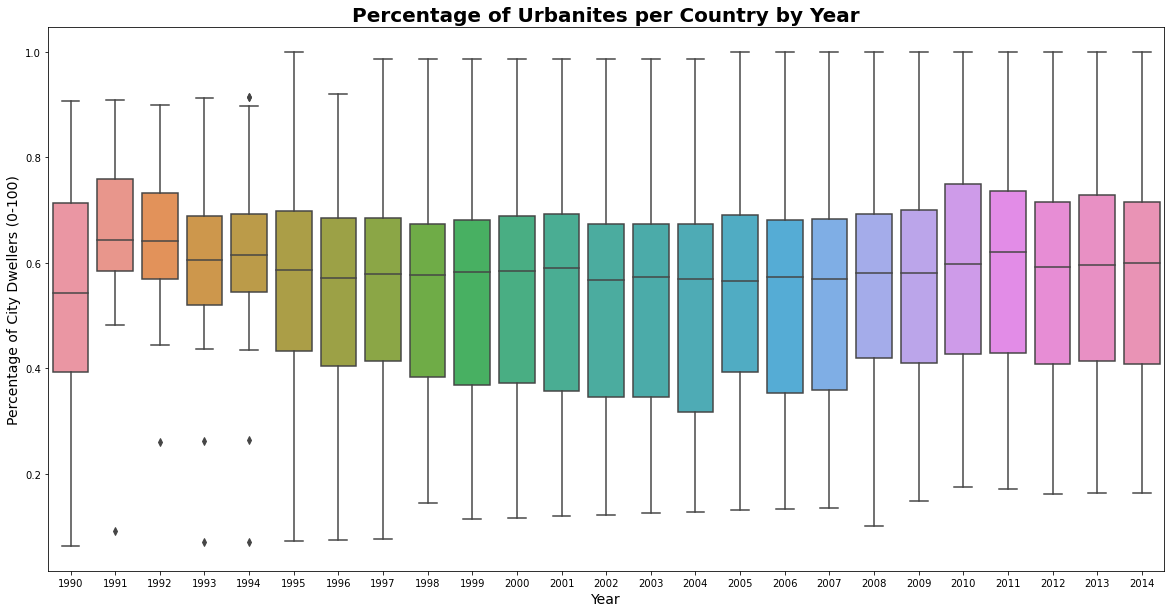

In [157]:
plt.figure(figsize = figsize_gen)
sns.boxplot(x = 'Year',
            y = 'urban_pct',
            data = gdp_internet_pop)
plt.xlabel('Year', fontsize = fontsize_label)
plt.ylabel('Percentage of City Dwellers (0-100)', fontsize = fontsize_label)
plt.title('Percentage of Urbanites per Country by Year', fontsize = fontsize_title, fontweight = fontweight_title);

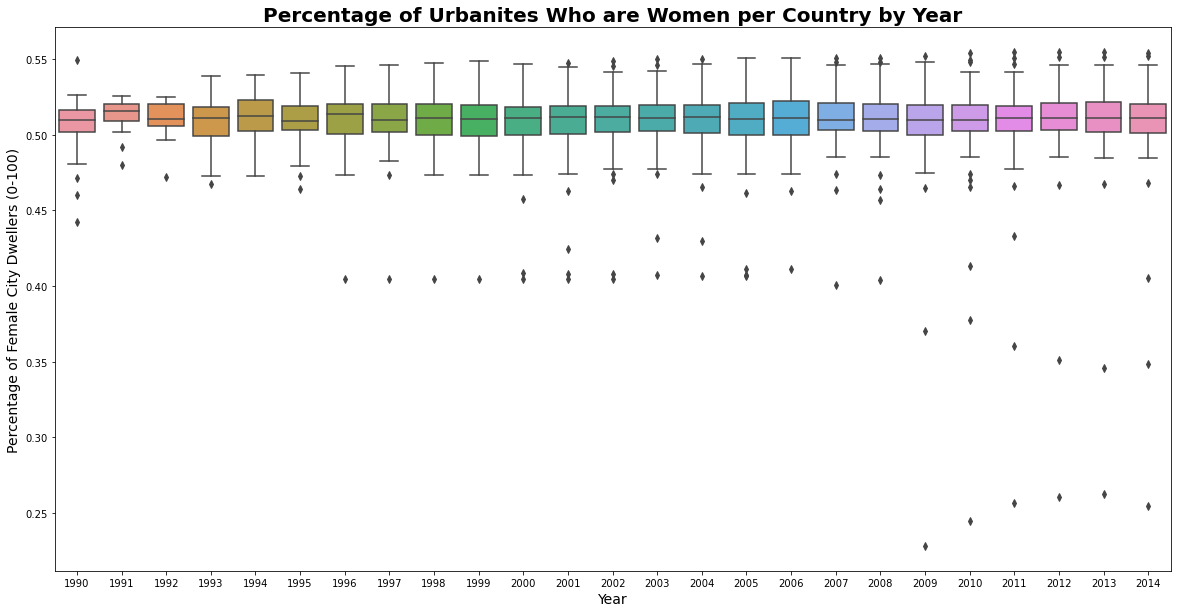

In [158]:
# Does the % of women in urban centers change over time?
plt.figure(figsize = figsize_gen)
sns.boxplot(x = 'Year',
            y = 'urban_f_pct',
            data = gdp_internet_pop)
plt.xlabel('Year', fontsize = fontsize_label)
plt.ylabel('Percentage of Female City Dwellers (0-100)', fontsize = fontsize_label)
plt.title('Percentage of Urbanites Who are Women per Country by Year', fontsize = fontsize_title, fontweight = fontweight_title);

In [159]:
# Check out the correlation matrix between all variables in the dataset:
gdp_internet_pop.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,f_urban,f_rural,m_urban,m_rural,urban_to_rural_ratio,urban_pct,urban_f_to_m_ratio,urban_f_pct
Year,1.000000,0.064187,0.564382,-0.003495,-0.026414,-0.007069,-0.027405,-0.023931,0.029480,-0.019617,-0.035738
GDP_Per_Capita,0.064187,1.000000,0.582438,-0.078041,-0.092268,-0.076544,-0.090389,0.097251,0.658719,-0.250169,-0.316854
Internet_Users_Pct,0.564382,0.582438,1.000000,-0.034403,-0.076737,-0.038093,-0.075425,0.050453,0.521901,0.059496,0.016897
f_urban,-0.003495,-0.078041,-0.034403,1.000000,0.912899,0.997953,0.911276,-0.020197,-0.066085,-0.127561,-0.101105
f_rural,-0.026414,-0.092268,-0.076737,0.912899,1.000000,0.934882,0.999909,-0.022490,-0.215862,-0.184206,-0.154439
m_urban,-0.007069,-0.076544,-0.038093,0.997953,0.934882,1.000000,0.933632,-0.019806,-0.081646,-0.146289,-0.118679
m_rural,-0.027405,-0.090389,-0.075425,0.911276,0.999909,0.933632,1.000000,-0.021946,-0.211832,-0.184249,-0.154548
urban_to_rural_ratio,-0.023931,0.097251,0.050453,-0.020197,-0.022490,-0.019806,-0.021946,1.000000,0.169677,-0.002903,0.000117
urban_pct,0.029480,0.658719,0.521901,-0.066085,-0.215862,-0.081646,-0.211832,0.169677,1.000000,0.151155,0.096047
urban_f_to_m_ratio,-0.019617,-0.250169,0.059496,-0.127561,-0.184206,-0.146289,-0.184249,-0.002903,0.151155,1.000000,0.984375


In [160]:
# Check out the correlation matrix between all variables in a specific year:
# gdp_internet_pop[gdp_internet_pop['Year'] == 2006].corr()

In [161]:
# Take a look at the correlation between percentage of urban dwellers to GDP Per Capita:
# gdp_internet_pop['urban_pct'].corr(gdp_internet_pop['GDP_Per_Capita'])

In [162]:
# Take a look at the correlation between percentage of urban dwellers to Internet Users:
# gdp_internet_pop['urban_pct'].corr(gdp_internet_pop['Internet_Users_Pct'])

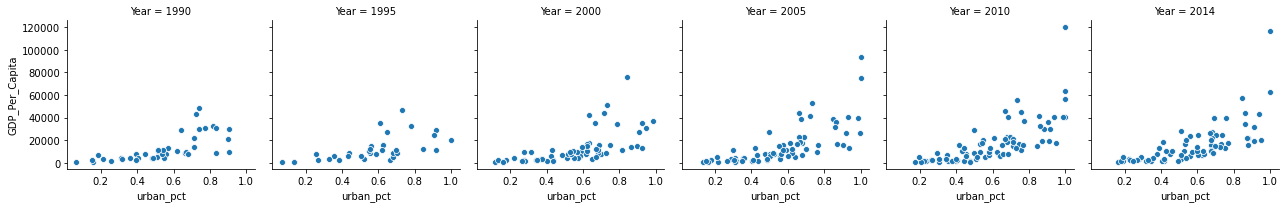

In [163]:
# Create a FacetGrid to show the evolution over time in the correlation between GDP per capita and percentage of population in urban areas:
urban_gdp = sns.FacetGrid(gdp_internet_pop[(gdp_internet_pop['Year'] == 1990) | (gdp_internet_pop['Year'] == 1995) | (gdp_internet_pop['Year'] == 2000) | (gdp_internet_pop['Year'] == 2005) | (gdp_internet_pop['Year'] == 2010) | (gdp_internet_pop['Year'] == 2014)], col = 'Year')
# And put data into it (N.B. these have to be in the same cell otherwise it will not work):
urban_gdp.map(sns.scatterplot, 'urban_pct', 'GDP_Per_Capita');

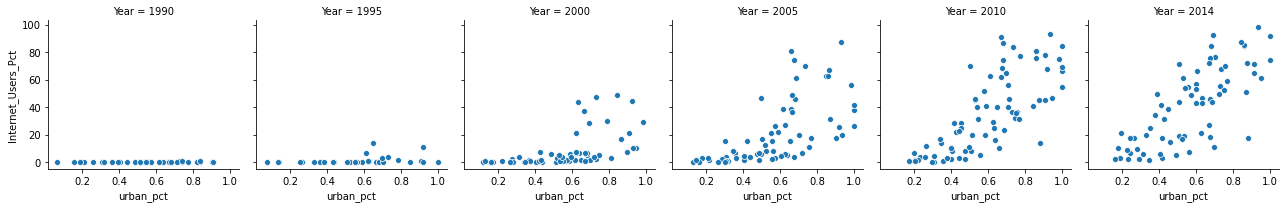

In [130]:
# Create a FacetGrid to show the evolution over time in the correlation between percentage of internet users and percentage of population in urban areas:
urban_internet = sns.FacetGrid(gdp_internet_pop[(gdp_internet_pop['Year'] == 1990) | (gdp_internet_pop['Year'] == 1995) | (gdp_internet_pop['Year'] == 2000) | (gdp_internet_pop['Year'] == 2005) | (gdp_internet_pop['Year'] == 2010) | (gdp_internet_pop['Year'] == 2014)], col = 'Year')
# And put data into it (N.B. these have to be in the same cell otherwise it will not work):
urban_internet.map(sns.scatterplot, 'urban_pct', 'Internet_Users_Pct');